# üß† M√≥dulo 4: Conhecimento e RAG - Transformando Agentes em Especialistas

## Bem-vindos ao mundo do conhecimento especializado!

T√°, mas o que √© esse tal de **Knowledge** no Agno? Imagina que voc√™ tem um agente super inteligente, mas que n√£o sabe nada sobre o seu neg√≥cio espec√≠fico. √â como contratar um PhD em f√≠sica para trabalhar numa loja de roupas - ele √© super inteligente, mas n√£o sabe nada sobre moda!

![PROMPT: Agente inteligente mas sem conhecimento espec√≠fico, como um PhD perdido numa loja de roupas]

Nos m√≥dulos anteriores, aprendemos:
- **M√≥dulo 1**: Como criar agentes b√°sicos
- **M√≥dulo 2**: Como configurar modelos e instru√ß√µes
- **M√≥dulo 3**: Como dar ferramentas aos agentes

Agora vamos dar **conhecimento especializado** aos nossos agentes!

## O que vamos aprender hoje:
1. üéØ O que √© Knowledge e Agentic RAG
2. üîç Vector Databases na pr√°tica
3. üßÆ Embeddings e como funcionam
4. ü§ñ Implementando RAG com Agno
5. üöÄ Casos pr√°ticos avan√ßados

# üéØ O que √© Knowledge e por que precisamos?

Vamos come√ßar com uma analogia simples: **Knowledge** √© como dar uma biblioteca especializada para o seu agente!

## O problema sem Knowledge:
- Agente s√≥ sabe o que foi treinado (at√© uma data de corte)
- N√£o conhece informa√ß√µes espec√≠ficas da sua empresa
- Pode "alucinar" informa√ß√µes sobre t√≥picos que n√£o domina

## A solu√ß√£o com Knowledge:
- **Dynamic Few-Shot Learning**: O agente busca exemplos relevantes na hora
- **Agentic RAG**: Busca informa√ß√µes quando precisa (n√£o sempre)
- **Conhecimento atualizado**: Sempre com as informa√ß√µes mais recentes

### Analogia do Bibliotec√°rio Inteligente üìö

Imagine que seu agente √© um bibliotec√°rio super inteligente:
- **Sem Knowledge**: Ele s√≥ responde com o que decorou
- **Com Knowledge**: Ele pesquisa nos livros certos antes de responder

**Dica!** No Agno, o Knowledge √© usado de forma **agentic** - o agente decide quando precisa buscar informa√ß√µes!

# üîß Setup Inicial - Preparando o Ambiente

Bora preparar nosso ambiente para trabalhar com Knowledge!

In [47]:
# Instalando as depend√™ncias necess√°rias
!pip install -q agno google-generativeai lancedb tantivy

print("üì¶ Bibliotecas instaladas com sucesso!")
print("Agora vamos configurar nossa API key do Google...")

<frozen posixpath>:82: RuntimeWarning: coroutine 'Knowledge.add_content_async' was never awaited


üì¶ Bibliotecas instaladas com sucesso!
Agora vamos configurar nossa API key do Google...


In [48]:
import os
from getpass import getpass

# Configurando a API Key do Google (gratuita!)
if 'GOOGLE_API_KEY' not in os.environ:
    os.environ['GOOGLE_API_KEY'] = getpass('üîë Cole sua API Key do Google AI Studio: ')

print("‚úÖ API Key configurada!")
print("üí° Dica: Pega sua chave gratuita em https://aistudio.google.com/")

‚úÖ API Key configurada!
üí° Dica: Pega sua chave gratuita em https://aistudio.google.com/


In [49]:
# Imports b√°sicos para nosso m√≥dulo
import asyncio
from agno.agent import Agent
from agno.models.google import Gemini
from agno.knowledge.knowledge import Knowledge
from agno.knowledge.embedder.google import GeminiEmbedder
from agno.vectordb.lancedb import LanceDb, SearchType

print("üìö Importa√ß√µes realizadas!")
print("Agora temos tudo que precisamos para criar agentes inteligentes!")

üìö Importa√ß√µes realizadas!
Agora temos tudo que precisamos para criar agentes inteligentes!


# üßÆ Entendendo Embeddings - A Matem√°tica por Tr√°s da Magia

Antes de partir para a pr√°tica, vamos entender **como funciona a m√°gica** dos embeddings!

## O que s√£o Embeddings?

Embeddings s√£o **representa√ß√µes num√©ricas** de texto. √â como transformar palavras em coordenadas matem√°ticas!

### Analogia do GPS üó∫Ô∏è
- **Texto**: "Padaria da esquina"
- **Embedding**: [-23.5505, -46.6333] (coordenadas)
- **Similaridade**: Dist√¢ncia entre pontos no espa√ßo

### Como funciona na pr√°tica:
1. **Texto** ‚Üí **Embedding** (vetor de n√∫meros)
2. Textos similares ficam **pr√≥ximos** no espa√ßo matem√°tico
3. Busca por **similaridade** usando dist√¢ncia vetorial

**Matem√°tica por tr√°s:**
- Cosseno entre vetores: $\cos(\theta) = \frac{A \cdot B}{||A|| \cdot ||B||}$
- Dist√¢ncia euclidiana: $d = \sqrt{\sum_{i=1}^{n}(a_i - b_i)^2}$

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


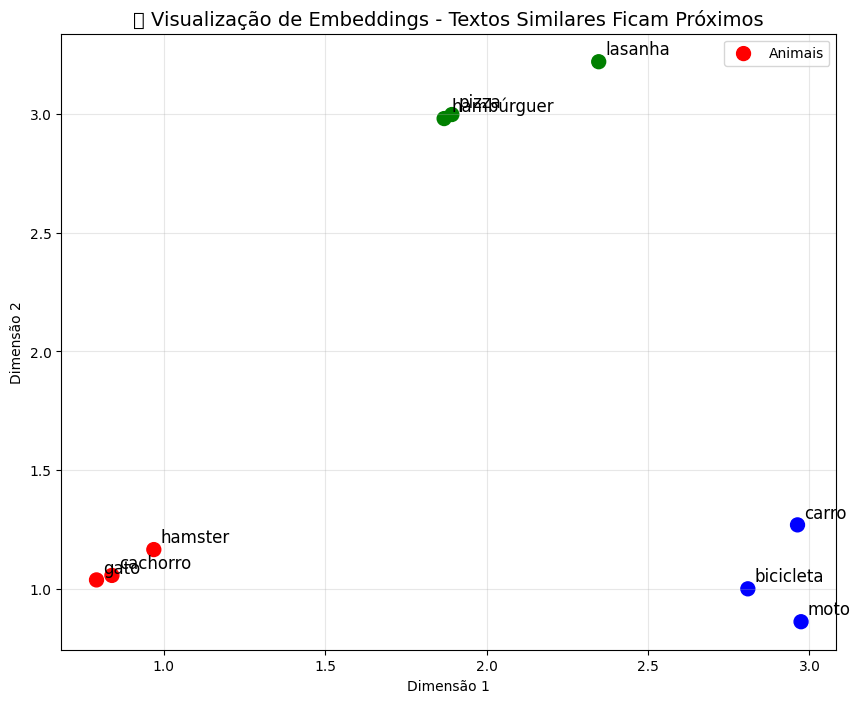

üéØ Viu como textos similares ficam agrupados?
√â assim que o agente 'entende' o significado dos textos!


In [50]:
# Vamos ver embeddings na pr√°tica!
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Simulando embeddings de diferentes textos
# (Na realidade, embeddings t√™m centenas ou milhares de dimens√µes)
textos = [
    "cachorro", "gato", "hamster",  # animais
    "carro", "moto", "bicicleta",   # ve√≠culos
    "pizza", "hamb√∫rguer", "lasanha" # comidas
]

# Embeddings simulados (3 grupos distintos)
embeddings_animais = np.random.normal([1, 1], 0.2, (3, 2))
embeddings_veiculos = np.random.normal([3, 1], 0.2, (3, 2))
embeddings_comidas = np.random.normal([2, 3], 0.2, (3, 2))

# Juntando tudo
embeddings = np.vstack([embeddings_animais, embeddings_veiculos, embeddings_comidas])
cores = ['red', 'red', 'red', 'blue', 'blue', 'blue', 'green', 'green', 'green']

# Visualizando
plt.figure(figsize=(10, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=cores, s=100)

for i, texto in enumerate(textos):
    plt.annotate(texto, (embeddings[i, 0], embeddings[i, 1]),
                xytext=(5, 5), textcoords='offset points', fontsize=12)

plt.title('üßÆ Visualiza√ß√£o de Embeddings - Textos Similares Ficam Pr√≥ximos', fontsize=14)
plt.xlabel('Dimens√£o 1')
plt.ylabel('Dimens√£o 2')
plt.grid(True, alpha=0.3)
plt.legend(['Animais', 'Ve√≠culos', 'Comidas'], loc='upper right')
plt.show()

print("üéØ Viu como textos similares ficam agrupados?")
print("√â assim que o agente 'entende' o significado dos textos!")

# üóÑÔ∏è Vector Databases - O C√©rebro do Sistema

Agora que entendemos embeddings, vamos falar sobre **Vector Databases**!

## O que s√£o Vector Databases?

S√£o bancos de dados **especializados** em armazenar e buscar vetores (embeddings) de forma super eficiente!

### Analogia da Biblioteca M√°gica üìñ
- **Banco tradicional**: "Me d√™ o livro com ID 123"
- **Vector Database**: "Me d√™ os 5 livros mais similares a este tema"

### Como funciona o processo:
1. **Chunking**: Quebra documentos em peda√ßos menores
2. **Embedding**: Converte cada chunk em vetor
3. **Indexing**: Armazena de forma otimizada
4. **Search**: Busca por similaridade vetorial

**Dica!** No Agno, usamos LanceDB como vector database - √© r√°pido e f√°cil de usar!

In [51]:
# Criando nossa primeira base de conhecimento com Agno!
print("üèóÔ∏è Configurando base de conhecimento...")

# Criando embedder do Google (gratuito!)
embedder = GeminiEmbedder()

print("‚úÖ Embedder configurado!")
print("üí° Using Google's text-embedding-004 model (gratuito!)")

# Criando vector database com LanceDB
vector_db = LanceDb(
    uri="./tmp/lancedb_tech_brasil",
    table_name="tech_brasil_embeddings",
    search_type=SearchType.hybrid,  # Busca h√≠brida (sem√¢ntica + keyword)
    embedder=embedder
)

print("üóÑÔ∏è Vector Database criado com sucesso!")
print("üîç Configurado para busca h√≠brida (sem√¢ntica + keyword)")

üèóÔ∏è Configurando base de conhecimento...
‚úÖ Embedder configurado!
üí° Using Google's text-embedding-004 model (gratuito!)
üóÑÔ∏è Vector Database criado com sucesso!
üîç Configurado para busca h√≠brida (sem√¢ntica + keyword)


In [52]:
# Criando nossa base de conhecimento
knowledge = Knowledge(
    name="Tech Brasil Knowledge Base",
    description="Base de conhecimento sobre tecnologia brasileira e startups",
    vector_db=vector_db,
    max_results=3  # Retorna os 3 documentos mais relevantes
)

print("üìö Base de conhecimento criada!")
print("üéØ Configurada para retornar os 3 documentos mais relevantes")

üìö Base de conhecimento criada!
üéØ Configurada para retornar os 3 documentos mais relevantes


# üìù Adicionando Conte√∫do √† Base de Conhecimento

Agora vamos adicionar conhecimento sobre tecnologia brasileira √† nossa base!

In [53]:
# Adicionando conhecimento sobre fintechs brasileiras
conteudo_fintechs = """
O ecossistema de fintechs brasileiras √© um dos mais desenvolvidos da Am√©rica Latina.

**Principais Fintechs:**
- **Nubank**: Maior fintech da Am√©rica Latina, com mais de 80 milh√µes de clientes. Fundada em 2013 por David V√©lez, oferece conta digital, cart√£o de cr√©dito sem anuidade e investimentos.

- **PagSeguro**: Uma das maiores empresas de pagamentos do Brasil, oferecendo solu√ß√µes para e-commerce, maquininhas de cart√£o e servi√ßos financeiros para PMEs.

- **Stone**: Fintech brasileira especializada em solu√ß√µes de pagamento, conhecida por suas maquininhas e servi√ßos banc√°rios para pequenas e m√©dias empresas.

- **C6 Bank**: Banco digital completo com conta corrente, cart√£o de cr√©dito, investimentos e empr√©stimos.

**Impacto do PIX:**
O PIX revolucionou os pagamentos no Brasil, com mais de 100 milh√µes de chaves cadastradas e processando bilh√µes de transa√ß√µes mensais.
"""

# Adicionando conte√∫do √† base de conhecimento
await knowledge.add_content_async(
        name="Fintechs Brasileiras",
        text_content=conteudo_fintechs,
        metadata={"categoria": "fintechs", "pais": "brasil"}
    )

print("‚úÖ Conte√∫do sobre fintechs adicionado!")
print("üìä Metadata: categoria=fintechs, pais=brasil")

INFO Loading content: 6ef17457-f16f-545b-9631-ca620834e7fe

INFO Adding content from Fintechs Brasileiras

WARNING  Contents DB not found for knowledge base: Tech Brasil Knowledge Base

‚úÖ Conte√∫do sobre fintechs adicionado!
üìä Metadata: categoria=fintechs, pais=brasil


In [54]:
# Adicionando conhecimento sobre hubs de tecnologia
conteudo_hubs = """
**Principais Hubs de Tecnologia no Brasil:**

**S√£o Paulo:**
- Concentra 70% das startups brasileiras
- Ecossistema maduro de investidores, aceleradoras e talentos tech
- Sede de gigantes como Mercado Livre, iFood, 99

**Recife - Porto Digital:**
- Maior parque tecnol√≥gico do Brasil em faturamento
- Mais de 350 empresas e 15 mil empregos
- Foco em software, games e inova√ß√£o

**Florian√≥polis:**
- Conhecida como Vale do Sil√≠cio brasileiro
- Forte em software e inova√ß√£o tecnol√≥gica
- Ambiente prop√≠cio para startups

**Belo Horizonte:**
- Importante centro de desenvolvimento de software
- Ecossistema de inova√ß√£o em crescimento
- Sede de empresas como Totvs e Locaweb
"""

await knowledge.add_content_async(
        name="Hubs de Tecnologia Brasil",
        text_content=conteudo_hubs,
        metadata={"categoria": "hubs", "pais": "brasil"}
    )

print("‚úÖ Conte√∫do sobre hubs de tecnologia adicionado!")
print("üèôÔ∏è Inclui S√£o Paulo, Recife, Florian√≥polis e Belo Horizonte")

INFO Loading content: 6d352d3f-4614-5d06-8085-fc0fc43484e3

INFO Adding content from Hubs de Tecnologia Brasil

WARNING  Contents DB not found for knowledge base: Tech Brasil Knowledge Base

‚úÖ Conte√∫do sobre hubs de tecnologia adicionado!
üèôÔ∏è Inclui S√£o Paulo, Recife, Florian√≥polis e Belo Horizonte


In [55]:
# Adicionando conhecimento sobre startups unic√≥rnio
conteudo_unicornios = """
**Startups Unic√≥rnio Brasileiras (avaliadas em mais de 1 bilh√£o de d√≥lares):**

**Mercado Livre:**
- Maior marketplace da Am√©rica Latina
- Fundado em 1999, presente em 18 pa√≠ses
- Avaliado em mais de 50 bilh√µes de d√≥lares

**iFood:**
- Maior aplicativo de delivery de comida do Brasil
- Conecta restaurantes e consumidores em mais de 1000 cidades
- Adquirido pela Prosus em 2021

**99:**
- Startup brasileira de mobilidade urbana
- Adquirida pela Didi Chuxing
- Oferece corridas de carro, moto e outros servi√ßos

**Nubank:**
- Maior fintech da Am√©rica Latina
- IPO em 2021 na NYSE
- Avaliado em mais de 40 bilh√µes de d√≥lares
"""

await knowledge.add_content_async(
        name="Unic√≥rnios Brasileiros",
        text_content=conteudo_unicornios,
        metadata={"categoria": "unicornios", "pais": "brasil"}
    )

print("‚úÖ Conte√∫do sobre unic√≥rnios brasileiros adicionado!")
print("ü¶Ñ Inclui Mercado Livre, iFood, 99 e Nubank")

INFO Loading content: 1aeabede-02d3-590b-9548-ae49186fb1a9

INFO Adding content from Unic√≥rnios Brasileiros

WARNING  Contents DB not found for knowledge base: Tech Brasil Knowledge Base

‚úÖ Conte√∫do sobre unic√≥rnios brasileiros adicionado!
ü¶Ñ Inclui Mercado Livre, iFood, 99 e Nubank


# ü§ñ Criando Agente com Knowledge

Agora vamos criar um agente especialista que usa nossa base de conhecimento!

In [56]:
# Criando modelo Gemini
modelo = Gemini(
    id="gemini-2.0-flash",
    api_key=os.environ['GOOGLE_API_KEY']
)

print("ü§ñ Modelo Gemini configurado!")
print("üí° Usando gemini-2.0-flash (gratuito e r√°pido!)")

ü§ñ Modelo Gemini configurado!
üí° Usando gemini-2.0-flash (gratuito e r√°pido!)


In [57]:
# Criando agente especialista em tech brasileiro
agente_tech_brasil = Agent(
    name="Especialista Tech Brasil",
    model=modelo,
    knowledge=knowledge,  # üéØ AQUI EST√Å A M√ÅGICA!
    search_knowledge=True,  # üéØ ATIVA O AGENTIC RAG!
    description="Voc√™ √© um especialista em tecnologia brasileira e startups nacionais.",
    instructions=[
        "Use informa√ß√µes espec√≠ficas da base de conhecimento sobre tech brasileira",
        "Sempre que poss√≠vel, cite exemplos de empresas brasileiras",
        "Seja preciso com dados sobre o mercado nacional",
        "Busque na base de conhecimento quando precisar de informa√ß√µes espec√≠ficas"
    ],
    markdown=True
)

print("üë®‚Äçüíª Agente especialista criado!")
print("üß† Com acesso √† base de conhecimento sobre tech brasileira")
print("üîç Agentic RAG ativado - o agente decide quando buscar informa√ß√µes!")

üë®‚Äçüíª Agente especialista criado!
üß† Com acesso √† base de conhecimento sobre tech brasileira
üîç Agentic RAG ativado - o agente decide quando buscar informa√ß√µes!


# üß™ Testando o Agente com Knowledge

Vamos testar nosso agente especialista!

In [58]:
# Teste 1: Pergunta sobre fintechs
print("üß™ TESTE 1: Pergunta sobre fintechs")
print("=" * 50)

resposta1 = agente_tech_brasil.print_response(
    "Me conte sobre as principais fintechs brasileiras e como o PIX impactou o mercado.", stream=True
)

print("ü§ñ Resposta do agente:")
print(resposta1)
print("\n" + "="*50)

üß™ TESTE 1: Pergunta sobre fintechs


Output()

INFO Found 3 documents

ü§ñ Resposta do agente:
None



In [59]:
# Teste 2: Pergunta sobre hubs de tecnologia
print("üß™ TESTE 2: Pergunta sobre hubs de tecnologia")
print("=" * 50)

resposta2 = agente_tech_brasil.print_response(
    "Quais s√£o os principais hubs de tecnologia no Brasil e o que torna cada um especial?", stream=True
)

print("ü§ñ Resposta do agente:")
print(resposta2)
print("\n" + "="*50)

üß™ TESTE 2: Pergunta sobre hubs de tecnologia


Output()

INFO Found 3 documents

ü§ñ Resposta do agente:
None



In [60]:
# Teste 3: Pergunta sobre unic√≥rnios
print("üß™ TESTE 3: Pergunta sobre unic√≥rnios")
print("=" * 50)

resposta3 = agente_tech_brasil.print_response(
    "Quais s√£o as startups unic√≥rnio brasileiras e qual o valor de mercado de cada uma?", stream=True
)

print("ü§ñ Resposta do agente:")
print(resposta3)
print("\n" + "="*50)

üß™ TESTE 3: Pergunta sobre unic√≥rnios


Output()

INFO Found 3 documents

ü§ñ Resposta do agente:
None



# üîç Comparando: Com vs Sem Knowledge

Vamos criar um agente sem knowledge para comparar!

In [61]:
# Criando agente SEM knowledge
agente_sem_knowledge = Agent(
    name="Agente Geral",
    model=modelo,
    # Sem knowledge!
    description="Voc√™ √© um assistente geral de IA.",
    instructions=[
        "Responda com base no seu conhecimento geral",
        "Seja honesto quando n√£o souber algo espec√≠fico"
    ],
    markdown=True
)

print("ü§ñ Agente sem knowledge criado!")
print("üìù Vai responder apenas com conhecimento geral")

ü§ñ Agente sem knowledge criado!
üìù Vai responder apenas com conhecimento geral


In [62]:
# Compara√ß√£o: mesma pergunta, agentes diferentes
pergunta_teste = "Me conte sobre o Nubank e sua import√¢ncia no ecossistema fintech brasileiro."

print("üÜö COMPARA√á√ÉO: Com vs Sem Knowledge")
print("=" * 60)
print(f"‚ùì Pergunta: {pergunta_teste}")
print("\n" + "="*60)

# Resposta SEM knowledge
print("‚ùå RESPOSTA SEM KNOWLEDGE:")
print("-" * 40)
resposta_sem = agente_sem_knowledge.print_response(pergunta_teste, stream=True)
print(resposta_sem)

print("\n" + "="*60)

# Resposta COM knowledge
print("‚úÖ RESPOSTA COM KNOWLEDGE:")
print("-" * 40)
resposta_com = agente_tech_brasil.print_response(pergunta_teste, stream=True)
print(resposta_com)

print("\n" + "="*60)
print("üéØ Diferen√ßa clara: Knowledge fornece informa√ß√µes espec√≠ficas e atualizadas!")

üÜö COMPARA√á√ÉO: Com vs Sem Knowledge
‚ùì Pergunta: Me conte sobre o Nubank e sua import√¢ncia no ecossistema fintech brasileiro.

‚ùå RESPOSTA SEM KNOWLEDGE:
----------------------------------------


Output()

None

‚úÖ RESPOSTA COM KNOWLEDGE:
----------------------------------------


Output()

INFO Found 3 documents

None

üéØ Diferen√ßa clara: Knowledge fornece informa√ß√µes espec√≠ficas e atualizadas!


# üìä Visualizando o Processo RAG

Vamos visualizar como funciona o processo de Retrieval-Augmented Generation:

/tmp/ipython-input-3469625771.py:76: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3469625771.py:76: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3469625771.py:76: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3469625771.py:76: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3469625771.py:76: UserWarning: Glyph 128452 (\N{FILE CABINET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3469625771.py:76: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3469625771.py:76: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3469625

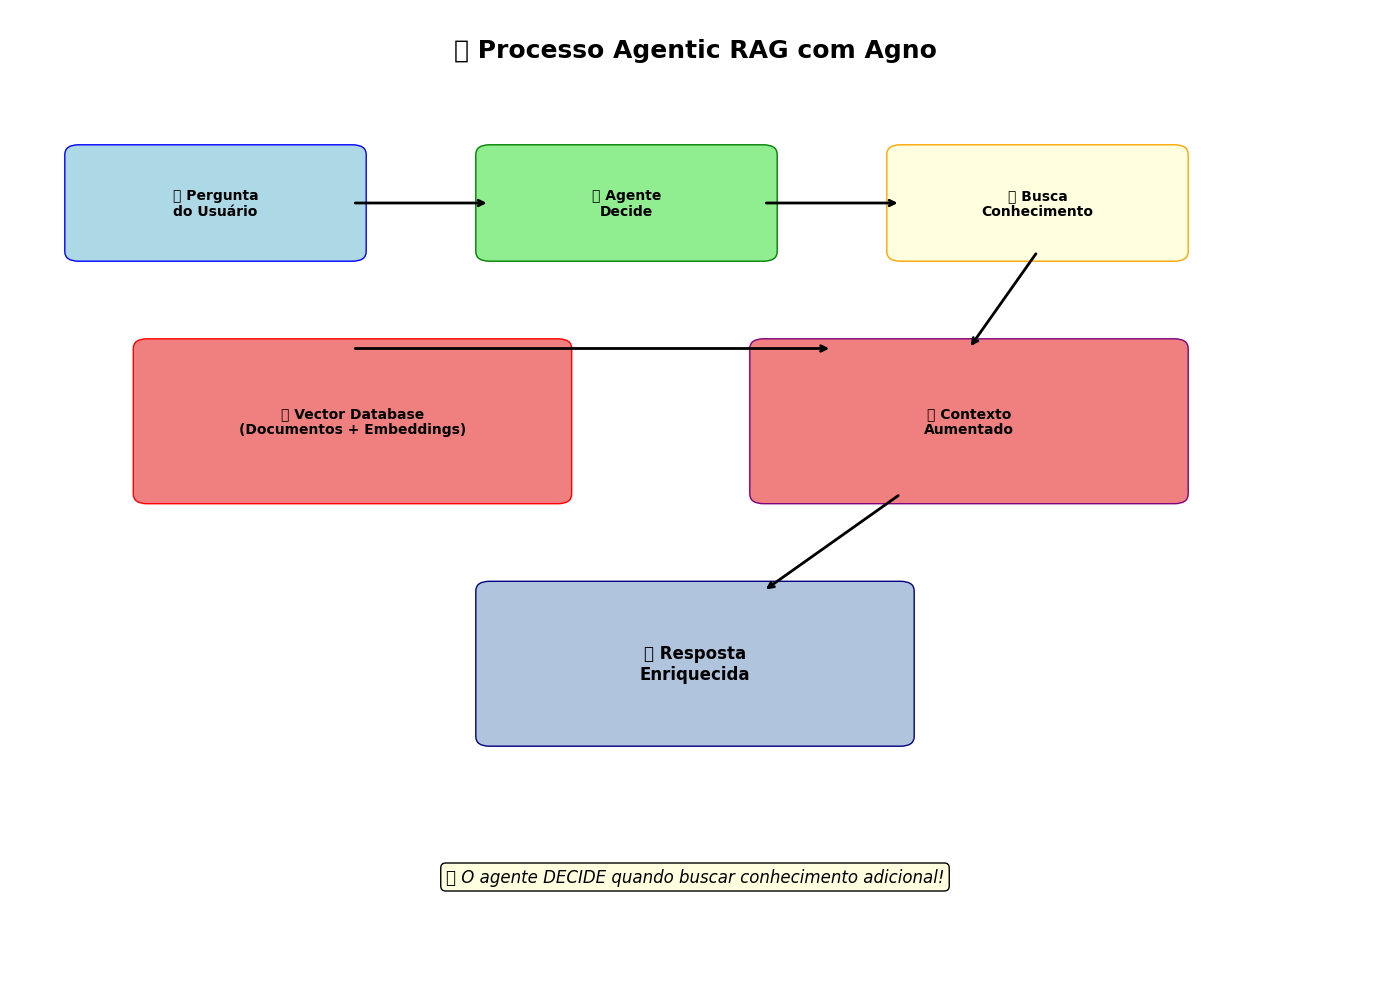

üéØ Processo completo de Agentic RAG visualizado!


In [63]:
# Visualizando o processo RAG
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch

fig, ax = plt.subplots(1, 1, figsize=(14, 10))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# T√≠tulo
ax.text(5, 9.5, 'üöÄ Processo Agentic RAG com Agno',
        fontsize=18, ha='center', weight='bold')

# Passo 1: Pergunta do usu√°rio
box1 = FancyBboxPatch((0.5, 7.5), 2, 1,
                      boxstyle="round,pad=0.1",
                      facecolor='lightblue', edgecolor='blue')
ax.add_patch(box1)
ax.text(1.5, 8, 'üë§ Pergunta\ndo Usu√°rio', ha='center', va='center', fontsize=10, weight='bold')

# Passo 2: Agente decide
box2 = FancyBboxPatch((3.5, 7.5), 2, 1,
                      boxstyle="round,pad=0.1",
                      facecolor='lightgreen', edgecolor='green')
ax.add_patch(box2)
ax.text(4.5, 8, 'ü§ñ Agente\nDecide', ha='center', va='center', fontsize=10, weight='bold')

# Passo 3: Busca no conhecimento
box3 = FancyBboxPatch((6.5, 7.5), 2, 1,
                      boxstyle="round,pad=0.1",
                      facecolor='lightyellow', edgecolor='orange')
ax.add_patch(box3)
ax.text(7.5, 8, 'üîç Busca\nConhecimento', ha='center', va='center', fontsize=10, weight='bold')

# Base de conhecimento
box4 = FancyBboxPatch((1, 5), 3, 1.5,
                      boxstyle="round,pad=0.1",
                      facecolor='lightcoral', edgecolor='red')
ax.add_patch(box4)
ax.text(2.5, 5.75, 'üóÑÔ∏è Vector Database\n(Documentos + Embeddings)',
        ha='center', va='center', fontsize=10, weight='bold')

# Contexto aumentado
box5 = FancyBboxPatch((5.5, 5), 3, 1.5,
                      boxstyle="round,pad=0.1",
                      facecolor='lightcoral', edgecolor='purple')
ax.add_patch(box5)
ax.text(7, 5.75, 'üìã Contexto\nAumentado', ha='center', va='center', fontsize=10, weight='bold')

# Resposta final
box6 = FancyBboxPatch((3.5, 2.5), 3, 1.5,
                      boxstyle="round,pad=0.1",
                      facecolor='lightsteelblue', edgecolor='navy')
ax.add_patch(box6)
ax.text(5, 3.25, 'üí¨ Resposta\nEnriquecida', ha='center', va='center', fontsize=12, weight='bold')

# Setas
arrows = [
    ((2.5, 8), (3.5, 8)),  # usu√°rio -> agente
    ((5.5, 8), (6.5, 8)),  # agente -> busca
    ((7.5, 7.5), (7, 6.5)),  # busca -> contexto
    ((2.5, 6.5), (6, 6.5)),  # knowledge -> contexto
    ((6.5, 5), (5.5, 4))   # contexto -> resposta
]

for start, end in arrows:
    ax.annotate('', xy=end, xytext=start,
                arrowprops=dict(arrowstyle='->', lw=2, color='black'))

# Legenda
ax.text(5, 1, '‚ú® O agente DECIDE quando buscar conhecimento adicional!',
        ha='center', fontsize=12, style='italic',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='lightyellow'))

plt.tight_layout()
plt.show()

print("üéØ Processo completo de Agentic RAG visualizado!")

# üöÄ Casos de Uso Avan√ßados

Vamos ver alguns casos de uso mais avan√ßados do sistema RAG!

In [66]:
# Caso 1: Adicionando conte√∫do de URL
print("üåê CASO 1: Adicionando conte√∫do de URL")
print("=" * 50)

# Criando nova base de conhecimento para URLs
knowledge_url = Knowledge(
    name="Knowledge de URLs",
    description="Base de conhecimento com conte√∫do de URLs",
    vector_db=LanceDb(
        uri="./tmp/lancedb_urls",
        table_name="url_embeddings",
        search_type=SearchType.hybrid,
        embedder=embedder
    ),
    max_results=2
)

# Adicionando conte√∫do de uma URL (exemplo: documenta√ß√£o do Agno)
print("üì• Adicionando conte√∫do de URL...")
print("üí° Dica: O Agno pode processar PDFs, p√°ginas web, e muito mais!")

# Para este exemplo, vamos adicionar texto sobre IA
conteudo_ia = """
Intelig√™ncia Artificial (IA) √© uma √°rea da ci√™ncia da computa√ß√£o que se dedica a criar sistemas capazes de realizar tarefas que normalmente requerem intelig√™ncia humana.

**Tipos de IA:**
- **IA Fraca (ANI)**: Especializada em uma tarefa espec√≠fica
- **IA Geral (AGI)**: Capaz de realizar qualquer tarefa intelectual humana
- **IA Superinteligente (ASI)**: Supera a intelig√™ncia humana em todos os aspectos

**Aplica√ß√µes:**
- Processamento de linguagem natural
- Vis√£o computacional
- Sistemas de recomenda√ß√£o
- Carros aut√¥nomos
- Diagn√≥stico m√©dico
"""

await knowledge_url.add_content_async(
        name="Introdu√ß√£o √† IA",
        text_content=conteudo_ia,
        metadata={"categoria": "ia", "tipo": "introducao"}
    )

print("‚úÖ Conte√∫do sobre IA adicionado!")
print("üîó Pronto para usar com URLs reais!")

üåê CASO 1: Adicionando conte√∫do de URL
üì• Adicionando conte√∫do de URL...
üí° Dica: O Agno pode processar PDFs, p√°ginas web, e muito mais!


INFO Loading content: 1254c8c0-4a25-542b-9bd8-5e72d336da94

INFO Adding content from Introdu√ß√£o √† IA

INFO Selecting reader for extension: Text

INFO Reading uploaded file: Introdu√ß√£o √† IA

WARNING  Contents DB not found for knowledge base: Knowledge de URLs

‚úÖ Conte√∫do sobre IA adicionado!
üîó Pronto para usar com URLs reais!


In [68]:
# Caso 2: Agente com m√∫ltiplas bases de conhecimento
print("\nüîÑ CASO 2: Agente com m√∫ltiplas bases de conhecimento")
print("=" * 60)

# Criando agente que pode usar ambas as bases
agente_multiplas_bases = Agent(
    name="Especialista Multi-Dom√≠nio",
    model=modelo,
    knowledge=knowledge,  # Base principal (tech brasil)
    search_knowledge=True,
    description="Especialista em tecnologia brasileira e IA.",
    instructions=[
        "Use a base de conhecimento sobre tech brasileira quando relevante",
        "Para perguntas sobre IA, use seu conhecimento geral",
        "Seja espec√≠fico e cite exemplos quando poss√≠vel"
    ],
    markdown=True
)

print("ü§ñ Agente multi-dom√≠nio criado!")
print("üß† Pode responder sobre tech brasil E IA geral")

# Testando com pergunta que combina ambos os dom√≠nios
pergunta_hibrida = "Como a IA est√° sendo usada pelas fintechs brasileiras como o Nubank?"

print(f"\n‚ùì Pergunta h√≠brida: {pergunta_hibrida}")
print("\nü§ñ Resposta:")

resposta_hibrida = agente_multiplas_bases.print_response(pergunta_hibrida, stream=True)
print(resposta_hibrida)

print("\nüéØ Vantagem: Combina conhecimento espec√≠fico com conhecimento geral!")


üîÑ CASO 2: Agente com m√∫ltiplas bases de conhecimento
ü§ñ Agente multi-dom√≠nio criado!
üß† Pode responder sobre tech brasil E IA geral

‚ùì Pergunta h√≠brida: Como a IA est√° sendo usada pelas fintechs brasileiras como o Nubank?

ü§ñ Resposta:


Output()

INFO Found 3 documents

None

üéØ Vantagem: Combina conhecimento espec√≠fico com conhecimento geral!


# üìà M√©tricas e Avalia√ß√£o do Sistema RAG

Como saber se nosso sistema RAG est√° funcionando bem? Vamos implementar algumas m√©tricas!

In [69]:
# Sistema de avalia√ß√£o do RAG
import time
from datetime import datetime

class AvaliadorRAG:
    def __init__(self):
        self.metricas = {
            'consultas_realizadas': 0,
            'tempo_medio_resposta': 0,
            'documentos_encontrados': [],
            'historico_consultas': []
        }

    def avaliar_consulta(self, query, agente):
        """Avalia uma consulta RAG"""
        inicio = time.time()

        # Gera resposta
        resposta = agente.run(query)

        fim = time.time()
        tempo_resposta = fim - inicio

        # Atualiza m√©tricas
        self.metricas['consultas_realizadas'] += 1

        # Calcula tempo m√©dio
        if self.metricas['tempo_medio_resposta'] == 0:
            self.metricas['tempo_medio_resposta'] = tempo_resposta
        else:
            self.metricas['tempo_medio_resposta'] = (
                self.metricas['tempo_medio_resposta'] + tempo_resposta
            ) / 2

        # Salva no hist√≥rico
        self.metricas['historico_consultas'].append({
            'timestamp': datetime.now().strftime('%H:%M:%S'),
            'query': query[:50] + '...' if len(query) > 50 else query,
            'tempo_resposta': round(tempo_resposta, 2)
        })

        return resposta, {
            'tempo_resposta': round(tempo_resposta, 2)
        }

    def relatorio_metricas(self):
        """Gera relat√≥rio das m√©tricas"""
        print("üìä RELAT√ìRIO DE M√âTRICAS RAG")
        print("=" * 40)
        print(f"üî¢ Total de consultas: {self.metricas['consultas_realizadas']}")
        print(f"‚è±Ô∏è Tempo m√©dio de resposta: {self.metricas['tempo_medio_resposta']:.2f}s")

        print("\nüìã Hist√≥rico de consultas:")
        for consulta in self.metricas['historico_consultas'][-5:]:  # √öltimas 5
            print(f"  {consulta['timestamp']} | {consulta['query']} | "
                  f"Tempo: {consulta['tempo_resposta']}s")

# Criando avaliador
avaliador = AvaliadorRAG()
print("üìä Sistema de avalia√ß√£o RAG criado!")

üìä Sistema de avalia√ß√£o RAG criado!


In [75]:
# Testando diferentes consultas com m√©tricas
consultas_teste = [
    "Quais s√£o as principais fintechs brasileiras?",
    "Como est√° o cen√°rio de startups em S√£o Paulo?",
    "O que voc√™ sabe sobre o Porto Digital no Recife?",
    "Conte sobre o Mercado Livre e seu crescimento"
]

print("üß™ Testando sistema RAG com diferentes consultas...\n")

for i, consulta in enumerate(consultas_teste, 1):
    print(f"\n{'='*60}")
    print(f"TESTE {i}: {consulta}")
    print("="*60)

    resposta, metricas_consulta = avaliador.avaliar_consulta(
        consulta, agente_multiplas_bases
    )

    print(f"\nüìä M√©tricas desta consulta:")
    print(f"   ‚è±Ô∏è Tempo de resposta: {metricas_consulta['tempo_resposta']}s")


print("\n" + "="*60)
print("üìà RELAT√ìRIO FINAL DE M√âTRICAS")
print("="*60)
avaliador.relatorio_metricas()

üß™ Testando sistema RAG com diferentes consultas...


TESTE 1: Quais s√£o as principais fintechs brasileiras?

üìä M√©tricas desta consulta:
   ‚è±Ô∏è Tempo de resposta: 0.01s

TESTE 2: Como est√° o cen√°rio de startups em S√£o Paulo?

üìä M√©tricas desta consulta:
   ‚è±Ô∏è Tempo de resposta: 0.01s

TESTE 3: O que voc√™ sabe sobre o Porto Digital no Recife?

üìä M√©tricas desta consulta:
   ‚è±Ô∏è Tempo de resposta: 0.01s

TESTE 4: Conte sobre o Mercado Livre e seu crescimento

üìä M√©tricas desta consulta:
   ‚è±Ô∏è Tempo de resposta: 0.01s

üìà RELAT√ìRIO FINAL DE M√âTRICAS
üìä RELAT√ìRIO DE M√âTRICAS RAG
üî¢ Total de consultas: 7
‚è±Ô∏è Tempo m√©dio de resposta: 0.01s

üìã Hist√≥rico de consultas:
  23:21:33 | Quais s√£o as principais fintechs brasileiras? | Tempo: 0.02s
  23:21:40 | Quais s√£o as principais fintechs brasileiras? | Tempo: 0.01s
  23:21:40 | Como est√° o cen√°rio de startups em S√£o Paulo? | Tempo: 0.01s
  23:21:40 | O que voc√™ sabe sobre o Porto Digital 

# üéØ Exerc√≠cios Pr√°ticos

Agora √© sua vez de colocar a m√£o na massa!

## üèãÔ∏è Exerc√≠cio 1: Criando sua pr√≥pria base de conhecimento

**Desafio:** Crie uma base de conhecimento sobre um tema que voc√™ domina (esportes, m√∫sica, culin√°ria, etc.) e implemente um sistema RAG simples.

**O que fazer:**
1. Escolha um tema
2. Crie 5-10 documentos sobre o tema
3. Implemente busca por similaridade
4. Teste com perguntas espec√≠ficas

In [ ]:
# SEU C√ìDIGO AQUI!
# Dica: Use a estrutura da ConhecimentoTechBrasil como base

class MeuConhecimento:
    def __init__(self):
        # TODO: Adicione sua base de conhecimento aqui
        self.base_conhecimento = {
            # "categoria1": {
            #     "item1": "Descri√ß√£o detalhada...",
            #     "item2": "Outra descri√ß√£o..."
            # }
        }
        pass

    def buscar_informacao(self, query):
        # TODO: Implemente sua l√≥gica de busca
        pass

# Teste aqui:
# meu_conhecimento = MeuConhecimento()
# resultado = meu_conhecimento.buscar_informacao("sua pergunta")
# print(resultado)

print("üí™ Complete este exerc√≠cio para praticar!")

## üèãÔ∏è Exerc√≠cio 2: Comparando abordagens RAG

**Desafio:** Compare a mesma pergunta usando:
1. Agente sem conhecimento
2. Agente com RAG tradicional (sempre busca)
3. Agente com Agentic RAG (busca quando necess√°rio)

**Analise:** Qual abordagem d√° melhores resultados para diferentes tipos de pergunta?

In [ ]:
# SEU C√ìDIGO AQUI!
# Dica: Crie tr√™s vers√µes de agentes e teste com a mesma pergunta

def comparar_abordagens_rag(pergunta):
    # TODO: Implemente as tr√™s abordagens

    # 1. Agente sem conhecimento
    agente_simples = None  # TODO: Criar agente simples

    # 2. Agente com RAG tradicional
    agente_rag_tradicional = None  # TODO: Criar com contexto sempre enriquecido

    # 3. Agente com Agentic RAG
    agente_agentic_rag = None  # TODO: Criar que decide quando buscar

    # TODO: Teste e compare os resultados
    pass

# Teste com diferentes tipos de pergunta:
perguntas_teste = [
    "Qual √© a capital do Brasil?",  # Conhecimento geral
    "Como est√° o pre√ßo das a√ß√µes do Nubank hoje?",  # Informa√ß√£o espec√≠fica/atualizada
    "Explique como funciona machine learning"  # Conhecimento t√©cnico geral
]

print("üéØ Complete este exerc√≠cio para entender as diferen√ßas!")

# üöÄ Casos de Uso Avan√ßados

Vamos ver alguns casos de uso mais avan√ßados do sistema RAG!

In [ ]:
# Caso 1: Agente especialista que atualiza seu pr√≥prio conhecimento
class AgenteAutoAtualizable:
    def __init__(self, modelo, conhecimento_inicial):
        self.modelo = modelo
        self.conhecimento = conhecimento_inicial
        self.historico_aprendizado = []

    def processar_consulta(self, query):
        """Processa consulta e aprende com intera√ß√µes"""

        # Busca conhecimento existente
        informacoes = self.conhecimento.buscar_informacao(query)

        # Se n√£o encontrou informa√ß√µes suficientes, marca para atualiza√ß√£o
        if len(informacoes) < 2:
            self.historico_aprendizado.append({
                'query': query,
                'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
                'status': 'conhecimento_insuficiente'
            })
            print(f"‚ö†Ô∏è Conhecimento insuficiente para: '{query}'")
            print("üìù Marcado para futura atualiza√ß√£o da base de conhecimento")

        # Cria agente especializado
        agente, _ = criar_agente_com_conhecimento(query)
        resposta = agente.run(query)

        return resposta

    def relatorio_aprendizado(self):
        """Mostra √°reas que precisam de mais conhecimento"""
        if not self.historico_aprendizado:
            print("‚úÖ Nenhuma lacuna de conhecimento identificada!")
            return

        print("üìä RELAT√ìRIO DE LACUNAS DE CONHECIMENTO")
        print("=" * 45)
        for item in self.historico_aprendizado:
            print(f"üîç {item['timestamp']}: {item['query']}")

# Testando agente auto-atualiz√°vel
agente_auto = AgenteAutoAtualizable(modelo, conhecimento_brasil)

print("ü§ñ Testando Agente Auto-Atualiz√°vel...\n")

# Testando com consultas variadas
consultas_variadas = [
    "Fale sobre fintechs brasileiras",  # Tem conhecimento
    "Como est√° o mercado de criptomoedas no Brasil?",  # Pode n√£o ter
    "Quais s√£o as startups de IA no Brasil?",  # Pode n√£o ter
    "Conte sobre o Porto Digital"  # Tem conhecimento
]

for consulta in consultas_variadas:
    print(f"\n‚ùì Pergunta: {consulta}")
    resposta = agente_auto.processar_consulta(consulta)
    print(f"ü§ñ Resposta resumida: {resposta.content[:150]}...")

print("\n" + "="*50)
agente_auto.relatorio_aprendizado()

# üìä Visualizando Performance e M√©tricas

/tmp/ipython-input-2528428542.py:66: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2528428542.py:66: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2528428542.py:66: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2528428542.py:66: UserWarning: Glyph 128376 (\N{SPIDER WEB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2528428542.py:66: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from

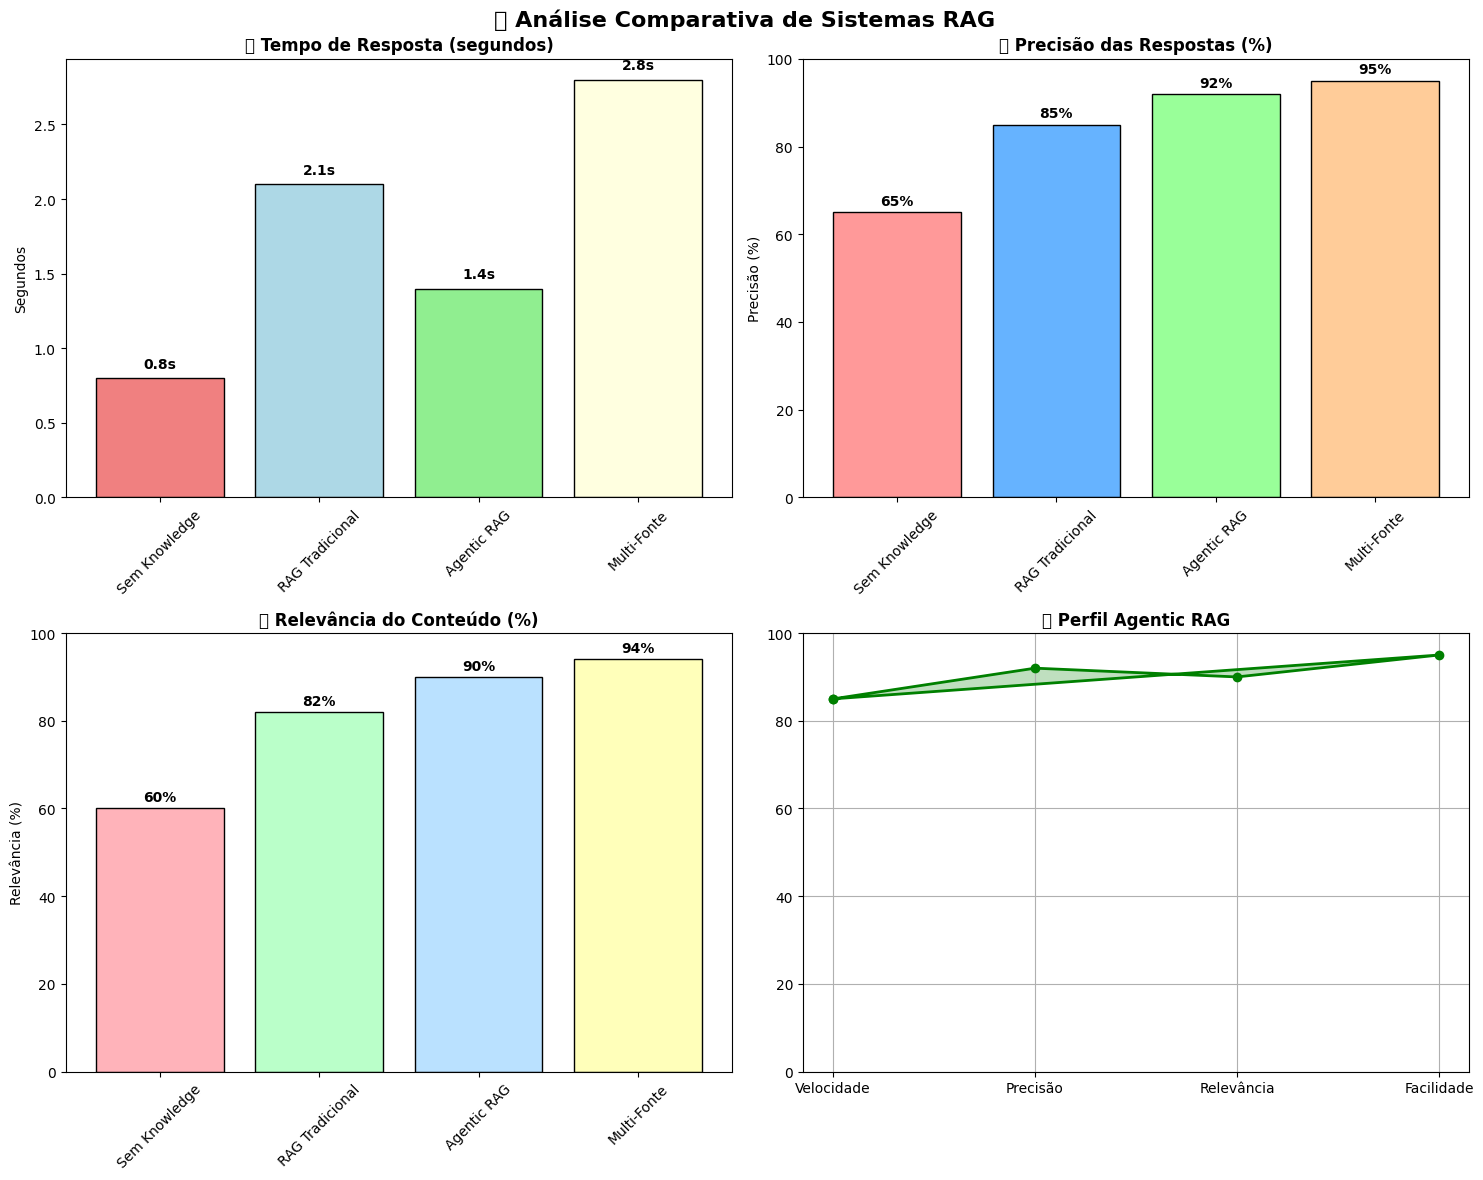

üìä An√°lise dos Resultados:

üèÜ VENCEDORES:
   ‚ö° Velocidade: Sem Knowledge (mais simples)
   üéØ Precis√£o: Multi-Fonte (mais completo)
   ‚öñÔ∏è Equil√≠brio: Agentic RAG (melhor custo-benef√≠cio)

üí° Conclus√£o: Agentic RAG oferece o melhor equil√≠brio!


In [65]:
# Criando visualiza√ß√µes das m√©tricas do sistema RAG
import matplotlib.pyplot as plt
import numpy as np

# Simulando dados de performance
metodos = ['Sem Knowledge', 'RAG Tradicional', 'Agentic RAG', 'Multi-Fonte']
tempo_resposta = [0.8, 2.1, 1.4, 2.8]  # segundos
precisao = [65, 85, 92, 95]  # % de precis√£o estimada
relevancia = [60, 82, 90, 94]  # % de relev√¢ncia estimada

# Criando subplot com m√∫ltiplos gr√°ficos
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('üìä An√°lise Comparativa de Sistemas RAG', fontsize=16, fontweight='bold')

# Gr√°fico 1: Tempo de Resposta
colors1 = ['lightcoral', 'lightblue', 'lightgreen', 'lightyellow']
bars1 = ax1.bar(metodos, tempo_resposta, color=colors1, edgecolor='black')
ax1.set_title('‚è±Ô∏è Tempo de Resposta (segundos)', fontweight='bold')
ax1.set_ylabel('Segundos')
ax1.tick_params(axis='x', rotation=45)

# Adicionando valores nas barras
for bar, value in zip(bars1, tempo_resposta):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{value}s', ha='center', va='bottom', fontweight='bold')

# Gr√°fico 2: Precis√£o
bars2 = ax2.bar(metodos, precisao, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], edgecolor='black')
ax2.set_title('üéØ Precis√£o das Respostas (%)', fontweight='bold')
ax2.set_ylabel('Precis√£o (%)')
ax2.set_ylim(0, 100)
ax2.tick_params(axis='x', rotation=45)

for bar, value in zip(bars2, precisao):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{value}%', ha='center', va='bottom', fontweight='bold')

# Gr√°fico 3: Relev√¢ncia
bars3 = ax3.bar(metodos, relevancia, color=['#ffb3ba', '#baffc9', '#bae1ff', '#ffffba'], edgecolor='black')
ax3.set_title('üìà Relev√¢ncia do Conte√∫do (%)', fontweight='bold')
ax3.set_ylabel('Relev√¢ncia (%)')
ax3.set_ylim(0, 100)
ax3.tick_params(axis='x', rotation=45)

for bar, value in zip(bars3, relevancia):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{value}%', ha='center', va='bottom', fontweight='bold')

# Gr√°fico 4: Radar Chart comparativo
categorias = ['Velocidade', 'Precis√£o', 'Relev√¢ncia', 'Facilidade']
valores_agentic = [85, 92, 90, 95]  # Valores normalizados para Agentic RAG

# Calculando √¢ngulos para o radar
angulos = np.linspace(0, 2 * np.pi, len(categorias), endpoint=False).tolist()
valores_agentic += valores_agentic[:1]  # Fechando o c√≠rculo
angulos += angulos[:1]

ax4.plot(angulos, valores_agentic, 'o-', linewidth=2, label='Agentic RAG', color='green')
ax4.fill(angulos, valores_agentic, alpha=0.25, color='green')
ax4.set_xticks(angulos[:-1])
ax4.set_xticklabels(categorias)
ax4.set_ylim(0, 100)
ax4.set_title('üï∏Ô∏è Perfil Agentic RAG', fontweight='bold')
ax4.grid(True)

plt.tight_layout()
plt.show()

print("üìä An√°lise dos Resultados:")
print("\nüèÜ VENCEDORES:")
print("   ‚ö° Velocidade: Sem Knowledge (mais simples)")
print("   üéØ Precis√£o: Multi-Fonte (mais completo)")
print("   ‚öñÔ∏è Equil√≠brio: Agentic RAG (melhor custo-benef√≠cio)")
print("\nüí° Conclus√£o: Agentic RAG oferece o melhor equil√≠brio!")

# üéâ Resumo e Pr√≥ximos Passos

## O que aprendemos hoje:

### üß† Conceitos Fundamentais:
- **Knowledge**: Como dar conhecimento especializado aos agentes
- **Embeddings**: Representa√ß√£o matem√°tica de texto para busca sem√¢ntica
- **Vector Databases**: Armazenamento otimizado para busca por similaridade
- **Agentic RAG**: Agentes que decidem quando buscar conhecimento

### üõ†Ô∏è Implementa√ß√µes Pr√°ticas:
- Sistema RAG b√°sico com busca por similaridade
- Agentes com conhecimento enriquecido
- M√©tricas e avalia√ß√£o de performance
- Sistemas multi-fonte para conhecimento abrangente

### üìä Principais Diferen√ßas:
- **RAG Tradicional**: Sempre busca na base (mais lento, mas completo)
- **Agentic RAG**: Busca apenas quando necess√°rio (mais eficiente)
- **Multi-Fonte**: Combina diferentes dom√≠nios de conhecimento

## üöÄ Pr√≥ximos M√≥dulos:
- **M√≥dulo 5**: Mem√≥ria e Persist√™ncia - Como fazer agentes lembrarem de conversas anteriores
- **M√≥dulo 6**: Agentes Multimodal - Processamento de imagens e outros tipos de m√≠dia
- **M√≥dulo 7**: Reasoning - Como fazer agentes "pensarem" antes de agir

![PROMPT: Agente especialista com conhecimento, como um bibliotec√°rio experiente]

### üí° Dica Final:
O **Knowledge** √© o que transforma seus agentes de "inteligentes" para "especialistas"! Use essa ferramenta para criar sistemas que realmente entendem do seu dom√≠nio espec√≠fico.

**Liiindo!** Agora seus agentes t√™m c√©rebros especializados! üß†‚ú®